In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("check").getOrCreate()

In [2]:
df = spark.read.jdbc(
    url="jdbc:postgresql://postgres:5432/demo",
    table="products",
    properties={
        "user": "postgres",
        "password": "postgres",
        "driver": "org.postgresql.Driver"
    }
)

df.select("id", "name", "brand", "price", "stock_quantity").show()

+---+------------------+--------+------+--------------+
| id|              name|   brand| price|stock_quantity|
+---+------------------+--------+------+--------------+
|  1|      Seem Usually|   Wayne|227.14|            33|
|  2|   Coach Something|   Wayne|345.71|           275|
|  3|    President Talk| Initech| 37.17|           181|
|  4| Successful Remain|   Wayne|258.89|           105|
|  5|    Writer Officer| Soylent| 86.23|           168|
|  6|Situation Response| Initech|232.29|           194|
|  7|     Nothing Study| Soylent| 39.18|           240|
|  8|         Admit Yes| Soylent|352.39|           135|
|  9|    Industry Exist| Soylent|340.67|           158|
| 10|      Hair Serious|   Stark|357.39|           160|
| 11|        One Assume|Umbrella|365.46|           188|
| 12|        Why Father| Soylent|277.08|           229|
| 13|      Believe Pick|   Wayne|194.66|           101|
| 14|     Probably Hear|   Wayne|473.63|           206|
| 15|      Modern Money| Initech|176.39|        

In [10]:
df.filter(df.price > 100).select("id", "name", "brand", "price", "stock_quantity").show()

+---+------------------+--------+------+--------------+
| id|              name|   brand| price|stock_quantity|
+---+------------------+--------+------+--------------+
|  1|      Seem Usually|   Wayne|227.14|            33|
|  2|   Coach Something|   Wayne|345.71|           275|
|  4| Successful Remain|   Wayne|258.89|           105|
|  6|Situation Response| Initech|232.29|           194|
|  8|         Admit Yes| Soylent|352.39|           135|
|  9|    Industry Exist| Soylent|340.67|           158|
| 10|      Hair Serious|   Stark|357.39|           160|
| 11|        One Assume|Umbrella|365.46|           188|
| 12|        Why Father| Soylent|277.08|           229|
| 13|      Believe Pick|   Wayne|194.66|           101|
| 14|     Probably Hear|   Wayne|473.63|           206|
| 15|      Modern Money| Initech|176.39|            61|
| 17|           Cut Low|    Acme|351.57|           132|
| 18|  Player Determine|  Globex|321.29|           197|
| 19|       Outside Sea|   Stark|420.40|        

In [11]:
df.filter(df.stock_quantity < 10).select("id", "name", "brand", "price", "stock_quantity").show()

+---+----------------+--------+------+--------------+
| id|            name|   brand| price|stock_quantity|
+---+----------------+--------+------+--------------+
| 75|        Then Art|Umbrella| 88.76|             6|
| 78|       Act House|Umbrella|397.80|             4|
|102|       Short Run|  Globex| 19.45|             6|
|124|     Who Respond|   Wayne|418.12|             7|
|133|     Degree Good| Soylent|251.26|             4|
|135|Program Maintain|   Stark|404.54|             8|
|175|        Pull Add| Soylent|269.60|             3|
|186|      Cell Front| Initech|404.19|             3|
+---+----------------+--------+------+--------------+



In [12]:
df.groupBy("brand").count().show()

+--------+-----+
|   brand|count|
+--------+-----+
| Soylent|   33|
|Umbrella|   33|
|    Acme|   22|
|  Globex|   25|
|   Wayne|   24|
| Initech|   34|
|   Stark|   29|
+--------+-----+



In [13]:
df.groupBy("brand").agg({"price": "avg"}).show()

+--------+----------+
|   brand|avg(price)|
+--------+----------+
| Soylent|238.703333|
|Umbrella|257.810303|
|    Acme|229.787727|
|  Globex|296.610800|
|   Wayne|247.737500|
| Initech|219.357941|
|   Stark|283.595517|
+--------+----------+



In [14]:
df.orderBy(df.price.desc()).select("id", "name", "brand", "price", "stock_quantity").show(10)

+---+---------------+--------+------+--------------+
| id|           name|   brand| price|stock_quantity|
+---+---------------+--------+------+--------------+
| 21|      Mr Nearly|   Stark|499.48|           162|
| 53|       Move Old|    Acme|495.58|            60|
|119| Usually Agency|Umbrella|492.90|           185|
|193|    Arrive Food|   Wayne|485.92|            60|
| 63|      Just Ever|Umbrella|485.29|           182|
|123|Recognize Could|  Globex|483.66|           219|
|187| Investment May|   Stark|482.81|           284|
|130|  Without Again|  Globex|482.56|           253|
|163| Blood Democrat|  Globex|482.16|           273|
|168|Family Suddenly|  Globex|473.68|           122|
+---+---------------+--------+------+--------------+
only showing top 10 rows



In [15]:
from pyspark.sql.functions import col

df.withColumn("inventory_value", col("price") * col("stock_quantity")) \
  .select("id", "name", "brand", "price", "stock_quantity", "inventory_value").show()

+---+------------------+--------+------+--------------+---------------+
| id|              name|   brand| price|stock_quantity|inventory_value|
+---+------------------+--------+------+--------------+---------------+
|  1|      Seem Usually|   Wayne|227.14|            33|        7495.62|
|  2|   Coach Something|   Wayne|345.71|           275|       95070.25|
|  3|    President Talk| Initech| 37.17|           181|        6727.77|
|  4| Successful Remain|   Wayne|258.89|           105|       27183.45|
|  5|    Writer Officer| Soylent| 86.23|           168|       14486.64|
|  6|Situation Response| Initech|232.29|           194|       45064.26|
|  7|     Nothing Study| Soylent| 39.18|           240|        9403.20|
|  8|         Admit Yes| Soylent|352.39|           135|       47572.65|
|  9|    Industry Exist| Soylent|340.67|           158|       53825.86|
| 10|      Hair Serious|   Stark|357.39|           160|       57182.40|
| 11|        One Assume|Umbrella|365.46|           188|       68

In [16]:
expensive = df.filter(df.price > 400)
expensive.select("id", "name", "brand", "price", "stock_quantity").write.jdbc(
    url="jdbc:postgresql://postgres:5432/demo",
    table="expensive_products",
    mode="overwrite",
    properties={
        "user": "postgres",
        "password": "postgres",
        "driver": "org.postgresql.Driver"
    }
)

In [17]:
expensive_products = spark.read.jdbc(
    url="jdbc:postgresql://postgres:5432/demo",
    table="expensive_products",
    properties={
        "user": "postgres",
        "password": "postgres",
        "driver": "org.postgresql.Driver"
    }
)
expensive_products.show()


+---+-----------------+--------+------+--------------+
| id|             name|   brand| price|stock_quantity|
+---+-----------------+--------+------+--------------+
| 14|    Probably Hear|   Wayne|473.63|           206|
| 19|      Outside Sea|   Stark|420.40|           188|
| 21|        Mr Nearly|   Stark|499.48|           162|
| 29|      Reason Help| Soylent|406.78|           157|
| 30|Science Challenge|Umbrella|458.90|           199|
| 43|     Several Easy| Initech|426.52|            39|
| 49|       Either Bad|  Globex|438.90|            49|
| 50|      Wrong Break|    Acme|411.56|           119|
| 51|       Like Issue|   Stark|410.33|            71|
| 53|         Move Old|    Acme|495.58|            60|
| 63|        Just Ever|Umbrella|485.29|           182|
| 70| Direction Reduce|   Stark|403.42|           205|
| 74|      Source Just| Soylent|436.29|           147|
| 81|        Full From| Initech|409.68|           193|
| 87| Authority Common| Soylent|457.24|           210|
| 90|    P

In [18]:
df.createOrReplaceTempView("products")
result = spark.sql("""
    SELECT id, name, brand, price, stock_quantity
    FROM products
    WHERE price > 100
""")
result.show()


+---+------------------+--------+------+--------------+
| id|              name|   brand| price|stock_quantity|
+---+------------------+--------+------+--------------+
|  1|      Seem Usually|   Wayne|227.14|            33|
|  2|   Coach Something|   Wayne|345.71|           275|
|  4| Successful Remain|   Wayne|258.89|           105|
|  6|Situation Response| Initech|232.29|           194|
|  8|         Admit Yes| Soylent|352.39|           135|
|  9|    Industry Exist| Soylent|340.67|           158|
| 10|      Hair Serious|   Stark|357.39|           160|
| 11|        One Assume|Umbrella|365.46|           188|
| 12|        Why Father| Soylent|277.08|           229|
| 13|      Believe Pick|   Wayne|194.66|           101|
| 14|     Probably Hear|   Wayne|473.63|           206|
| 15|      Modern Money| Initech|176.39|            61|
| 17|           Cut Low|    Acme|351.57|           132|
| 18|  Player Determine|  Globex|321.29|           197|
| 19|       Outside Sea|   Stark|420.40|        

In [19]:
categories = spark.read.jdbc(
    url="jdbc:postgresql://postgres:5432/demo",
    table="categories",
    properties={
        "user": "postgres",
        "password": "postgres",
        "driver": "org.postgresql.Driver"
    }
)

joined = df.join(categories, df.category_id == categories.id, "inner")

joined.select(
    df.id,
    df.name,
    df.brand,
    df.price,
    df.stock_quantity,
    categories.name.alias("category_name")
).show()


+---+------------------+--------+------+--------------+-------------+
| id|              name|   brand| price|stock_quantity|category_name|
+---+------------------+--------+------+--------------+-------------+
| 11|        One Assume|Umbrella|365.46|           188|  Electronics|
| 17|           Cut Low|    Acme|351.57|           132|  Electronics|
| 28|          Issue Be|    Acme|314.30|           248|  Electronics|
| 32|       Team Couple| Soylent|273.63|            98|  Electronics|
| 34|   Pattern Popular|    Acme|245.54|           232|  Electronics|
| 48|       Reflect Ago| Soylent| 29.36|           253|  Electronics|
| 49|        Either Bad|  Globex|438.90|            49|  Electronics|
| 57|      Star Quickly|    Acme| 32.02|           272|  Electronics|
| 64|      Girl Because|Umbrella|177.85|           284|  Electronics|
| 65|        Stock Word| Soylent| 51.61|           209|  Electronics|
| 67|       Cold Common| Initech| 34.95|            61|  Electronics|
| 75|          Then 

In [20]:
df.select("id", "name", "brand", "price", "stock_quantity") \
  .write.csv("/home/jovyan/output/products_export.csv", header=True, mode="overwrite")

In [ ]:
cleaned = df.dropna(subset=["id", "name", "brand", "price", "stock_quantity"])
cleaned.select("id", "name", "brand", "price", "stock_quantity").show()

import pandas as pd
import matplotlib.pyplot as plt

brand_counts = df.groupBy("brand").count().orderBy("count", ascending=False).toPandas()

plt.figure(figsize=(10,6))
plt.bar(brand_counts['brand'], brand_counts['count'])
plt.xlabel("Brand")
plt.ylabel("Number of Products")
plt.title("Number of Products per Brand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


+---+------------------+--------+------+--------------+
| id|              name|   brand| price|stock_quantity|
+---+------------------+--------+------+--------------+
|  1|      Seem Usually|   Wayne|227.14|            33|
|  2|   Coach Something|   Wayne|345.71|           275|
|  3|    President Talk| Initech| 37.17|           181|
|  4| Successful Remain|   Wayne|258.89|           105|
|  5|    Writer Officer| Soylent| 86.23|           168|
|  6|Situation Response| Initech|232.29|           194|
|  7|     Nothing Study| Soylent| 39.18|           240|
|  8|         Admit Yes| Soylent|352.39|           135|
|  9|    Industry Exist| Soylent|340.67|           158|
| 10|      Hair Serious|   Stark|357.39|           160|
| 11|        One Assume|Umbrella|365.46|           188|
| 12|        Why Father| Soylent|277.08|           229|
| 13|      Believe Pick|   Wayne|194.66|           101|
| 14|     Probably Hear|   Wayne|473.63|           206|
| 15|      Modern Money| Initech|176.39|        

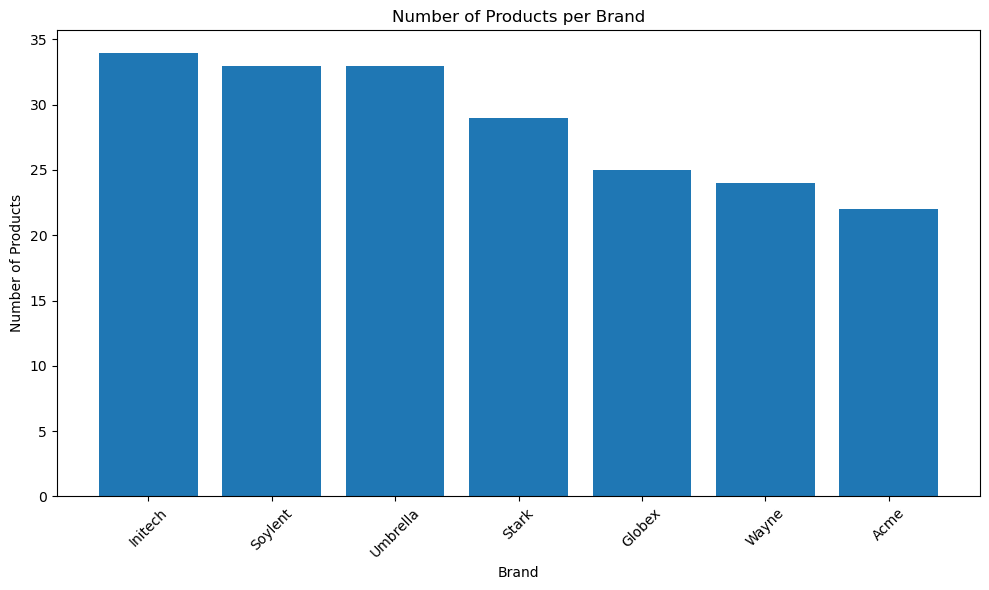

In [37]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("products_job") \
    .config("spark.hadoop.ipc.maximum.data.length", 536870912) \
    .getOrCreate()


In [42]:
df.select("id", "name", "brand", "price", "stock_quantity") \
  .write.csv("hdfs://hadoop-namenode:8020/user/pros/products_export", header=True, mode="overwrite")